# Test FEW toolkit 

In [17]:
import os
import timeit

from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.amplitude.romannet import RomanAmplitude
from few.amplitude.interp2dcubicspline import Interp2DAmplitude
from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux

In [10]:
use_gpu = False

# keyword arguments for inspiral generator (RunSchwarzEccFluxInspiral)
inspiral_kwargs={
        "DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
        "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    }

# keyword arguments for inspiral generator (RomanAmplitude)
amplitude_kwargs = {
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    "use_gpu": use_gpu  # GPU is available in this class
}

# keyword arguments for Ylm generator (GetYlms)
Ylm_kwargs = {
    "assume_positive_m": False  # if we assume positive m, it will generate negative m for all m>0
}

# keyword arguments for summation generator (InterpolatedModeSum)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

few = FastSchwarzschildEccentricFlux(
    inspiral_kwargs=inspiral_kwargs,
    amplitude_kwargs=amplitude_kwargs,
    Ylm_kwargs=Ylm_kwargs,
    sum_kwargs=sum_kwargs,
    use_gpu=use_gpu,
)

The waveform model produces $h(t) = h_p - ih_c(t)$. 

It takes as arguments $\{M, \mu, p_0, e_0, \Phi_{\phi,0}, \Phi_{r, 0}\}$. 
 - $M$ is the larger mass ($M_\odot$),
 - $\mu$ is the compact object mass ($M_\odot$), 
 - $p_0$ is the initial semi-latus rectum (dimensionless), 
 - $e_0$ is the initial eccentricity, 
 - the final two are the initial phases in $\phi, r$.

In [18]:
# multiple plots for different parameters
masses = [1e5, 1e6, 5e6, 1e7] # large mass in solar masses
distances = [1, 5, 1e1, 2e2] # distance in Gpc
mus = [1e1, 1e2, 1e3, 2e4]

mu0 = 1e2 
p0 = 12.0
e0 = 0.4
theta = np.pi/3  # polar viewing angle
phi = np.pi/4  # azimuthal viewing angle
dt = 10.0

def compute_wave(M, distance=1, mu=mu0):
    start = timeit.default_timer()
    wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=1.0, dist=distance)
    stop = timeit.default_timer()
    print(f"FEW for M={M}, mu={mu}, d={distance} took {stop-start} seconds.")  
    
    return wave

/home/jasper/anaconda3/envs/few_env/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/utils/baseclasses.py:430: UserWarning: Mass ratio is outside of generally accepted range for an extreme mass ratio (1e-4). (q=0.001)
  mu / M


Progress: 6%
Progress: 12%
Progress: 18%
Progress: 25%
Progress: 31%
Progress: 37%
Progress: 43%
Progress: 50%
Progress: 56%
Progress: 62%
Progress: 68%
Progress: 75%
Progress: 81%
Progress: 87%
Progress: 93%
Progress: 100%


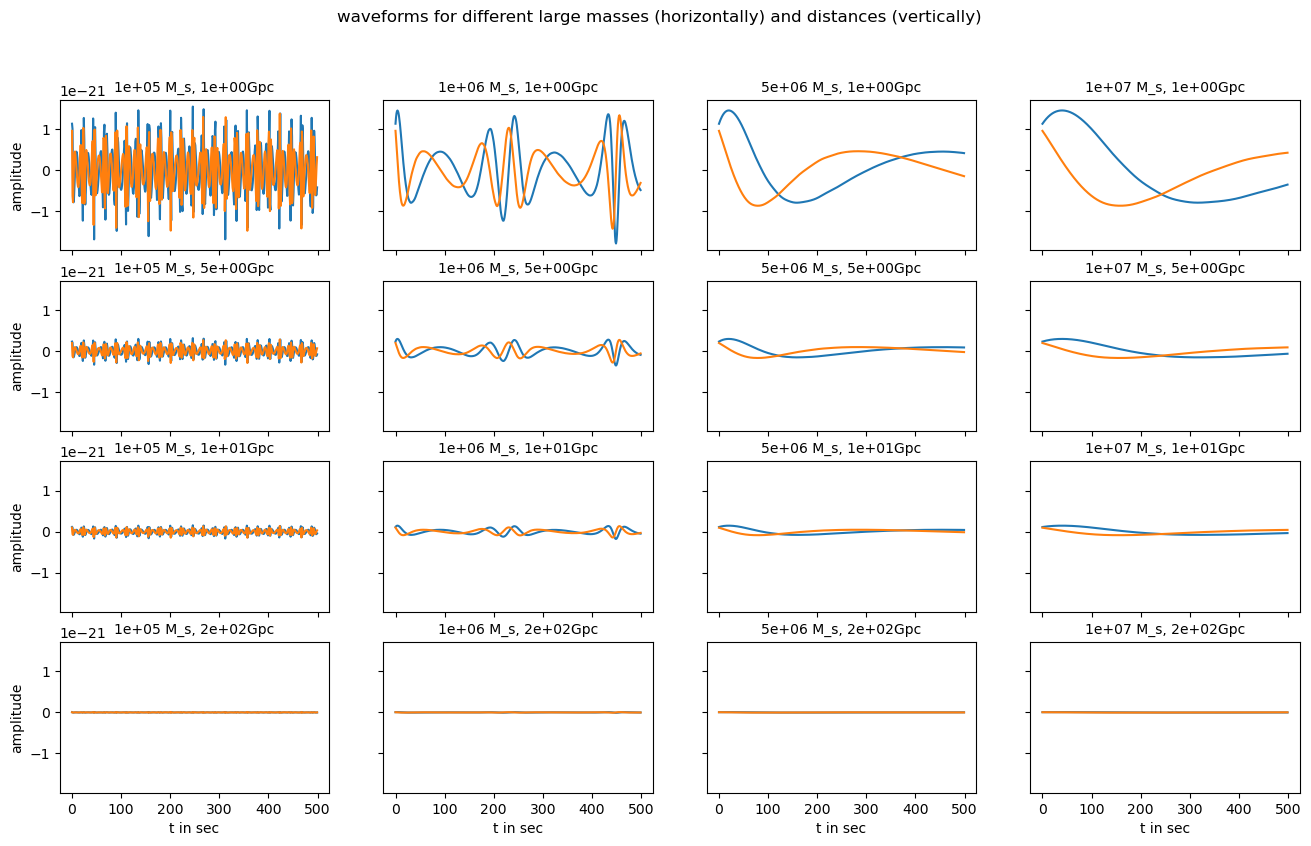

In [12]:
fig, axs = plt.subplots(
    len(distances), len(masses), 
    sharex=True, 
    sharey=True,
    figsize=(16,9))
fig.suptitle('waveforms for different large masses (horizontally) and distances (vertically)')

for column, mass in enumerate(masses):
    for row, distance in enumerate(distances):
        wave = compute_wave(mass, distance=distance)
        axs[row, column].plot(wave.real[:500])
        axs[row, column].plot(wave.imag[:500])
        axs[row, column].set_title(
            f"{'%.0e' % Decimal(mass)} M_s, {'%.0e' % Decimal(distance)}Gpc",
            fontsize=10)

        # progess
        number_of_plots = len(distances)*len(masses)
        current_plot = column*len(distances) + row + 1
        progress = current_plot/number_of_plots*100
        os.system('clear')
        print(f"Progress: {int(progress)}%")

for ax in axs.flat:
    ax.set(xlabel='t in sec', ylabel='amplitude')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig("masses_distances.png", dpi=300)



FEW for M=100000.0, mu=10.0, d=1 took 1.9632595900002343 seconds.
Progress: 6%


/home/jasper/anaconda3/envs/few_env/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/utils/baseclasses.py:430: UserWarning: Mass ratio is outside of generally accepted range for an extreme mass ratio (1e-4). (q=0.001)
  mu / M


FEW for M=100000.0, mu=100.0, d=1 took 0.386740349998945 seconds.
Progress: 12%
FEW for M=100000.0, mu=1000.0, d=1 took 0.1492661609991046 seconds.
Progress: 18%


/home/jasper/anaconda3/envs/few_env/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/utils/baseclasses.py:430: UserWarning: Mass ratio is outside of generally accepted range for an extreme mass ratio (1e-4). (q=0.01)
  mu / M
/home/jasper/anaconda3/envs/few_env/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/utils/baseclasses.py:430: UserWarning: Mass ratio is outside of generally accepted range for an extreme mass ratio (1e-4). (q=0.2)
  mu / M


FEW for M=100000.0, mu=20000.0, d=1 took 0.08870730000126059 seconds.
Progress: 25%
FEW for M=1000000.0, mu=10.0, d=1 took 24.021863108000616 seconds.
Progress: 31%
FEW for M=1000000.0, mu=100.0, d=1 took 16.865435186000468 seconds.
Progress: 37%
FEW for M=1000000.0, mu=1000.0, d=1 took 1.823607718999483 seconds.
Progress: 43%


/home/jasper/anaconda3/envs/few_env/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/utils/baseclasses.py:430: UserWarning: Mass ratio is outside of generally accepted range for an extreme mass ratio (1e-4). (q=0.02)
  mu / M


FEW for M=1000000.0, mu=20000.0, d=1 took 0.2249897609999607 seconds.
Progress: 50%
FEW for M=5000000.0, mu=10.0, d=1 took 20.311489385998357 seconds.
Progress: 56%
FEW for M=5000000.0, mu=100.0, d=1 took 22.2486769749994 seconds.
Progress: 62%


/home/jasper/anaconda3/envs/few_env/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/utils/baseclasses.py:430: UserWarning: Mass ratio is outside of generally accepted range for an extreme mass ratio (1e-4). (q=0.0002)
  mu / M


FEW for M=5000000.0, mu=1000.0, d=1 took 34.68852254899866 seconds.
Progress: 68%


/home/jasper/anaconda3/envs/few_env/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/utils/baseclasses.py:430: UserWarning: Mass ratio is outside of generally accepted range for an extreme mass ratio (1e-4). (q=0.004)
  mu / M


FEW for M=5000000.0, mu=20000.0, d=1 took 2.4260371330001362 seconds.
Progress: 75%
FEW for M=10000000.0, mu=10.0, d=1 took 22.85450229199887 seconds.
Progress: 81%
FEW for M=10000000.0, mu=100.0, d=1 took 23.40089251399877 seconds.
Progress: 87%
FEW for M=10000000.0, mu=1000.0, d=1 took 22.20813767999971 seconds.
Progress: 93%


/home/jasper/anaconda3/envs/few_env/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/utils/baseclasses.py:430: UserWarning: Mass ratio is outside of generally accepted range for an extreme mass ratio (1e-4). (q=0.002)
  mu / M


FEW for M=10000000.0, mu=20000.0, d=1 took 8.861093554000036 seconds.
Progress: 100%


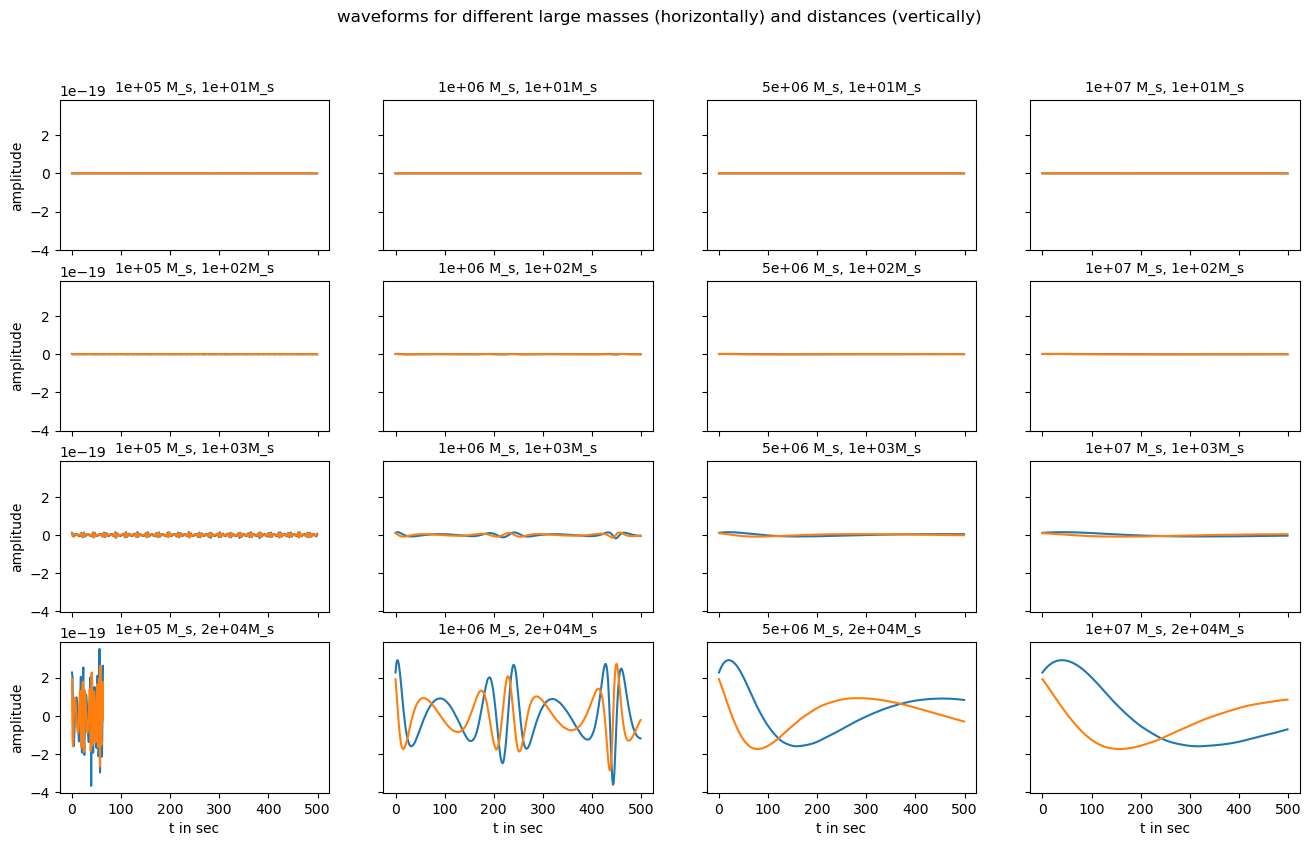

In [19]:
fig, axs = plt.subplots(
    len(distances), len(masses), 
    sharex=True, 
    sharey=True,
    figsize=(16,9))
fig.suptitle('waveforms for different large masses (horizontally) and distances (vertically)')

for column, mass in enumerate(masses):
    for row, mu in enumerate(mus):
        wave = compute_wave(mass, mu=mu)
        axs[row, column].plot(wave.real[:500])
        axs[row, column].plot(wave.imag[:500])
        axs[row, column].set_title(
            f"{'%.0e' % Decimal(mass)} M_s, {'%.0e' % Decimal(mu)}M_s",
            fontsize=10)

        # progess
        number_of_plots = len(mus)*len(masses)
        current_plot = column*len(mus) + row + 1
        progress = current_plot/number_of_plots*100
        os.system('clear')
        print(f"Progress: {int(progress)}%")

for ax in axs.flat:
    ax.set(xlabel='t in sec', ylabel='amplitude')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig("masses_mus.png", dpi=300)